## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

## Load Image

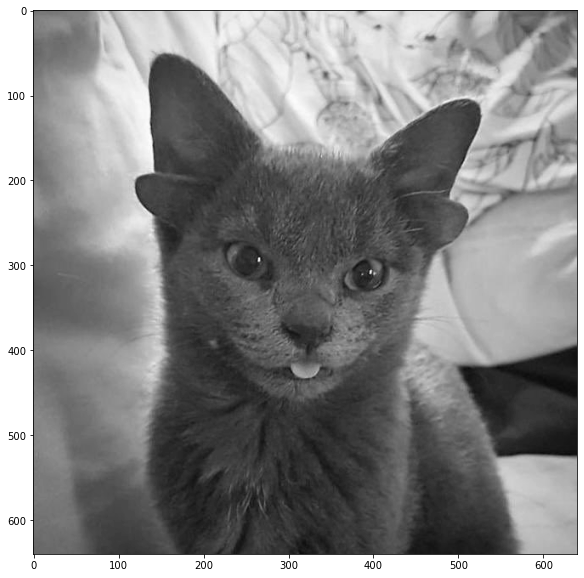

In [2]:
image = mpimg.imread("images/cat.jpeg")
image_gr = rgb2gray(image)

figureSize = (12,10)
plt.figure("Original Image", figsize=figureSize)
plt.imshow(image_gr)
plt.set_cmap("gray")

## Add Noise

## Gaussian Filter

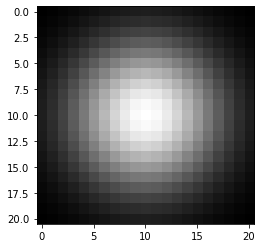

In [3]:
def gaussian_kernel( kernlen , std ):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

plt.imshow(gaussian_kernel(21,5), interpolation='none')

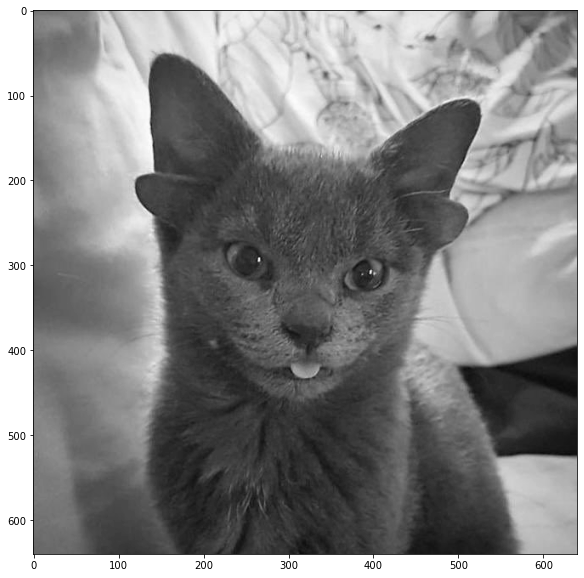

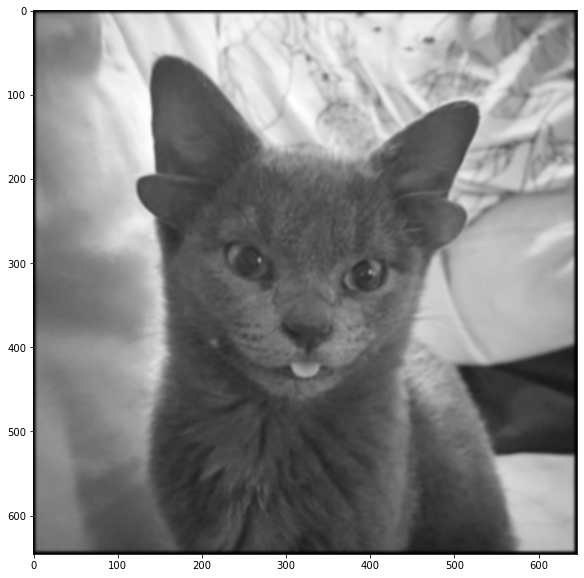

In [4]:
def gaussian_smooth(img, kernel_dim, std):
    return signal.convolve2d(img, gaussian_kernel(kernel_dim, std))

plt.figure("Noised", figsize = figureSize)
plt.imshow(image_gr)

plt.figure("Smoothed", figsize = figureSize)
plt.imshow(gaussian_smooth(image_gr, 7, 1.5))

## Gaussian Filter

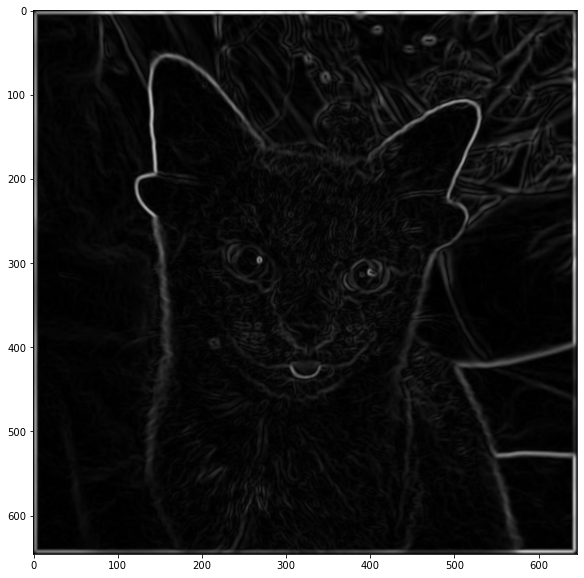

In [5]:
sobel_x = np.array([[ -1 , 0 , 1 ] ,
                    [ -2 , 0 , 2 ] ,
                    [ -1 , 0 , 1 ]])
sobel_y = sobel_x.T

def gradient_sobel(img):
    I_x = signal.convolve2d(img, sobel_x,'same')
    I_y = signal.convolve2d(img, sobel_y,'same')
    magnitude = np.sqrt(I_x ** 2 + I_y ** 2)    
    phase = np.arctan2(I_x, I_y)
    phase = (45 * np.round(phase / (np.pi / 4)) + 180) % 180
    return magnitude, phase
    
plt.figure("Sobel Gradient", figsize = figureSize)
grad, phase = gradient_sobel(gaussian_smooth(image_gr, 7, 1.5))
plt.imshow(grad)

#plt.figure("Sobel Phase", figsize = figureSize)
#plt.imshow(b)

## Double Thresholding

In [6]:
#high_ratio = 0.7
#low_ratio = 0.1
#max_val = np.max(grad)

#Th_h = max_val * high_ratio
#Th_l = max_val *  low_ratio


#plt.figure("Below threshold", figsize = figureSize)
#plt.imshow(grad)

ok


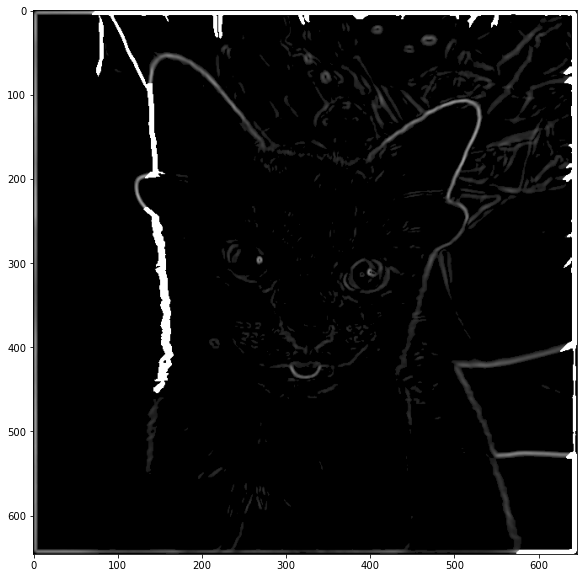

In [7]:
def hysteresis(img, low_ratio, high_ratio):
    max_val = np.max(grad)

    Th_h = max_val * high_ratio
    Th_l = max_val *  low_ratio

    img[img <= Th_l] = 0
    img[img > Th_h] = max_val
    
    cur = img
    eps = 0.01

    while True:
        nxt = cur
        for i in range(nxt.shape[0]):
            for j in range(nxt.shape[1]):
                if nxt[i, j] > Th_h:
                    for x in [-1, 0, 1]:
                        for y in [-1, 0, 1]:
                            new_i = i + x
                            new_j = j + y
                            if new_i < 0 or new_i >= nxt.shape[0] or new_j < 0 or new_j >= nxt.shape[1]:
                                continue
                            if nxt[new_i, new_j] > Th_l:
                                nxt[new_i, new_j] = max_val
        print("ok")
        if np.all(nxt - cur < eps):
            break
        cur = nxt
        
    return cur

plt.figure("Hysterisis", figsize = figureSize)
plt.imshow(hysteresis(grad, 0.1, 0.7))